Preview dataset:
         SDNN      rMSSD      pNN50  Class
0   53.998699  18.990753   1.005517      1
1  157.984773  36.002740  14.999960      1
2  128.998804  24.003266   4.005418      1
3   61.993824  13.005822  -0.005091      1
4  101.018840  17.987722   1.008869      1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SDNN    380 non-null    float64
 1   rMSSD   380 non-null    float64
 2   pNN50   380 non-null    float64
 3   Class   380 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.0 KB
None
Akurasi: 0.5789473684210527

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62        38
           1       0.60      0.47      0.53        38

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.57        76
weighted av

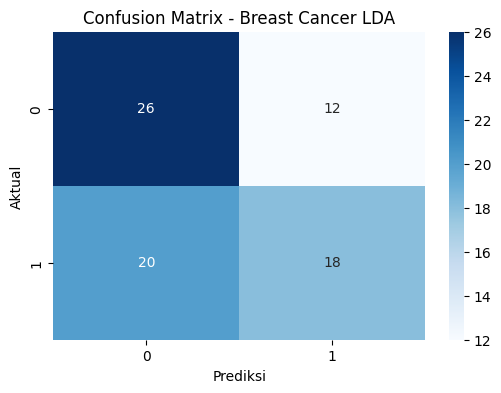

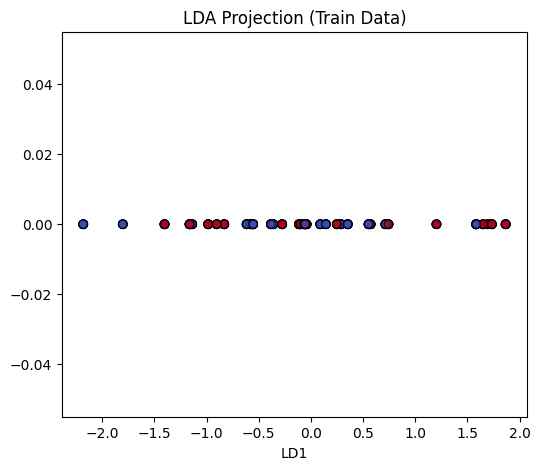

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("../Data/breast-cancer-dataset.csv")

print("Preview dataset:")
print(df.head())
print("\nInfo:")
print(df.info())

# 2. Pisahkan fitur (X) dan label (y)
# Ganti 'diagnosis' sesuai dengan nama kolom target di dataset kamu
X = df[["SDNN", "rMSSD", "pNN50"]]  # Fitur asli
y = df["Class"]                     # Label

# Jika target berupa string (misal: 'M' / 'B'), ubah ke angka
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))

# 3. Split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Buat model LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 6. Prediksi
y_pred = lda.predict(X_test)

# 7. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Breast Cancer LDA")
plt.show()

# 8. Visualisasi hasil LDA
X_lda = lda.transform(X_train)
plt.figure(figsize=(6,5))
plt.scatter(X_lda[:,0], np.zeros_like(X_lda[:,0]), c=y_train, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.title("LDA Projection (Train Data)")
plt.xlabel("LD1")
plt.show()
